# Convolutional Neural Networks

In this notebook we will be taking a closer look at convolutional neural networks.
We will use the `MNIST` dataset for this, so let's load this.

In [2]:
import pandas as pd

mnist_train = pd.read_csv('train.csv')
mnist_test = pd.read_csv('test.csv')

### Preparing the data

We need to transform the dataset in order to use it in a convolutional neural network.
First we need to separate the labels from the training set.

In [3]:
y = mnist_train['label']
X = mnist_train.drop(columns = 'label')

The first thing we need to do is to encode the labels.
We want to perform a classification task, thus we want to minimize a classification loss function.
In order to be able to do this in `Keras`, we need categorical labels.

In [4]:
from keras.utils import to_categorical

y = to_categorical(y, num_classes = 10)

2024-01-24 20:28:01.524611: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Next, `Keras` expects *tensors* as input.
Moreover, we want our input values to lie between 0 and 1.
So we need to transform our training set.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform = 'pandas')
scaler.fit(X)
X = scaler.transform(X)

In [6]:
X = X.values.reshape(-1, 28, 28, 1)

Let's check.

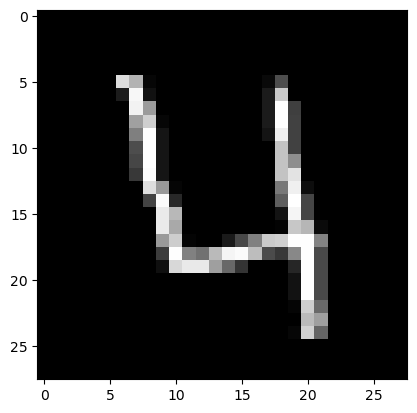

In [7]:
import matplotlib.pyplot as plt

_ = plt.imshow(X[3], cmap='gray')

### Building the network

In [8]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

We will be building a simple network here based on *LeNet5*.

In [9]:
input_shape = (28, 28, 1)

model = Sequential()

# Convolution layer 1
model.add(Conv2D(
    filters = 6,
    strides = (1,1),
    kernel_size = (5,5),
    activation = 'ReLU',
    input_shape = input_shape
))

# Pooling layer 1
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Convolution layer 2
model.add(Conv2D(
    filters = 12,
    strides = (1,1),
    kernel_size = (5,5),
    activation = 'ReLU'
))

# Pooling layer 2
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Flatten
model.add(Flatten())

# FC FF Layer 1
model.add(Dense(units=120, activation='ReLU'))

# FC FF Layer 2
model.add(Dense(units=84, activation='ReLU'))

# Output Layer
model.add(Dense(units=10, activation='softmax'))

In [10]:
#Optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 12)          1812      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 12)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 120)               2

### Training

In [11]:
epochs = 10
history = model.fit(X, y, epochs=epochs,batch_size=128, verbose=1)

Epoch 1/10
329/329 [==============================] - 9s 24ms/step - loss: 0.4418 - accuracy: 0.8681
Epoch 2/10
329/329 [==============================] - 8s 24ms/step - loss: 0.1035 - accuracy: 0.9677
Epoch 3/10
329/329 [==============================] - 8s 24ms/step - loss: 0.0726 - accuracy: 0.9771
Epoch 4/10
329/329 [==============================] - 8s 24ms/step - loss: 0.0578 - accuracy: 0.9817
Epoch 5/10
329/329 [==============================] - 8s 23ms/step - loss: 0.0498 - accuracy: 0.9840
Epoch 6/10
329/329 [==============================] - 8s 24ms/step - loss: 0.0418 - accuracy: 0.9862
Epoch 7/10
329/329 [==============================] - 8s 24ms/step - loss: 0.0372 - accuracy: 0.9879
Epoch 8/10
329/329 [==============================] - 8s 24ms/step - loss: 0.0333 - accuracy: 0.9892
Epoch 9/10
329/329 [==============================] - 8s 24ms/step - loss: 0.0278 - accuracy: 0.9906
Epoch 10/10
329/329 [==============================] - 8s 24ms/step - loss: 0.0244 - accura

Note, we did not pass a validation set in `Keras`.
It is not clear to me how to use this.

## A closer look

In order to better understand how a convolutional neural network works, we will pass an image through each stage of the neural network.
Let's first look at filters and convolution.
The convolution operation used in convolutional neural networks is *not* the usual mathematical convolution operation.
The usual convolution involves a reflection of the kernel.
As the weights of the kernel are obtaind from training, this reflection will be automatically learned, hence is unnecessary.
We have:
* 'convolution' = cross-correlation
* 'Filter' = convolution kernel

### Filters

In [12]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Filters originate from signal processing and inherit their name in machine learning instead of kernels.
You might now the Gaussian filter, which smoothes out edges in an image.
Here is how the convolution operation is defined classically:
Suppose we have integrable functions $f,g: \mathbb R^n \to \mathbb R$, then we have

$$ f * g (x) = \int f(t) g(x-t) dt $$

You can work out what this means in the discrete case. Notice that we are reflecting $g$. 
The function $g$ is also called *convolution kernel* or *filter*.
When we are not reflecting the kernel, the operation is called *cross correlation*.
This is in general used for convolutional neural networks, since such a network is supposed to learn the reflection.

From now on we will follow machine learning practice and refer to cross correlation as convolution.

We treat the higher dimensions only for discrete functions.
The idea for higher dimensions is to convolve and then add the results.
Here is the formula for matrices.
Suppose $T$ is a $(p, q)$ matrix and $W$ is a $(m, n)$ matrix. 
We will always assume that the kernel is smaller than the input.
Then we have

$$ T * W (i,j) = \sum_{k=0}^n \sum_{l=0}^m x_{i+k, j+l} w_{k,l} $$

The resulting matrix will have have a dimension of $(m-p+1, n-q+1)$.

Here is a quick example.

In [13]:
import numpy as np
from scipy import signal

T = np.array([[0, 1, 2],
              [ 3, 4, 5],
              [6, 7, 8]])
W = np.array([[0,1],
              [2,3]])

Z = signal.correlate(T,W, mode='valid')
Z

array([[19, 25],
       [37, 43]])

In image processing, we usually have as input tensors, which really are just higher dimensional arrays.
To perform a convolution, we just perform the matrix convolution for each dimension and then summing up the result.

Now, let's see how a filter works in image processing.
The idea is that the filter combs through the input and records if the image is similar to its shape.
Here is a filter looking for vertical lines.

In [14]:
filter = np.array([[0, 1, 0],
          [0, 1, 0],
          [0, 1, 0]])
filter = np.expand_dims(filter, axis=2)

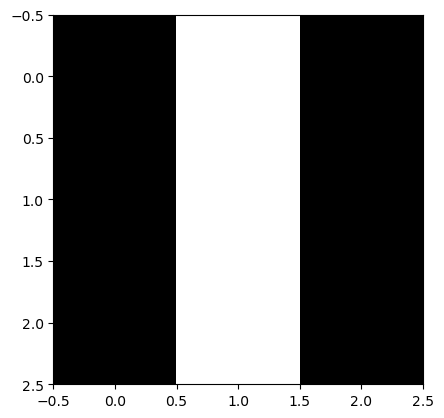

In [15]:
_ = plt.imshow(filter, cmap='gray')

We needed to expand the dimensions, as our input has a single grayscale channel.
The dimension always have to match.
Let's pick a number from our dataset.

In [16]:
filtered = signal.convolve(X[3], filter, mode='valid')
filtered.shape

(26, 26, 1)

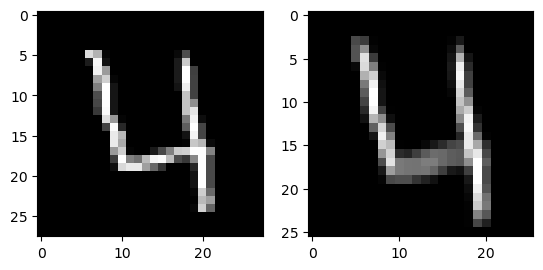

In [17]:
f, axarr = plt.subplots(1,2)
_ = axarr[0].imshow(X[3], cmap='gray')
_ = axarr[1].imshow(filtered, cmap='gray')

Let's see how a different filter works.

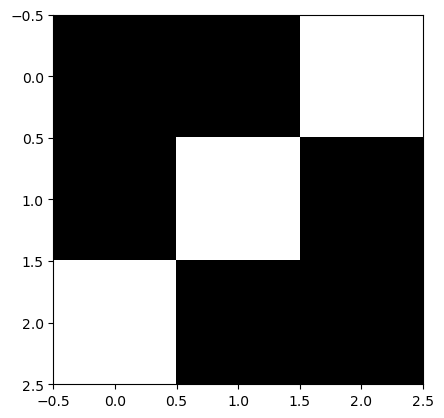

In [19]:
filter2 = np.array([[0, 0, 1],
          [0, 1, 0],
          [1, 0, 0]])
filter2 = np.expand_dims(filter2, axis=2)

_ = plt.imshow(filter2, cmap='gray')

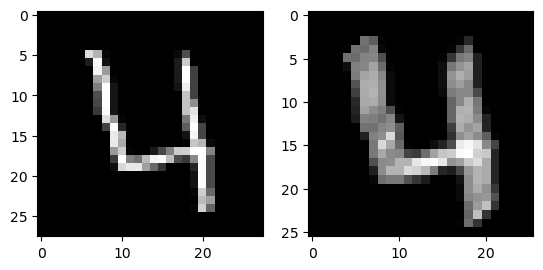

In [20]:
filtered2 = signal.convolve(X[3], filter2, mode='valid')

f, axarr = plt.subplots(1,2)
_ = axarr[0].imshow(X[3], cmap='gray')
_ = axarr[1].imshow(filtered2, cmap='gray')

Just for fun, let's also look what a Gaussian filter does.

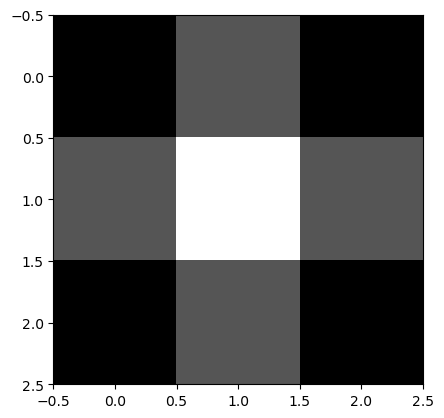

In [21]:
gauss = np.array([[0.0625, 0.125, 0.0625],
                 [0.125, 0.25, 0.125],
                  [0.0625, 0.125, 0.0625]])
gauss = np.expand_dims(gauss, axis=2)

_ = plt.imshow(gauss, cmap='gray')

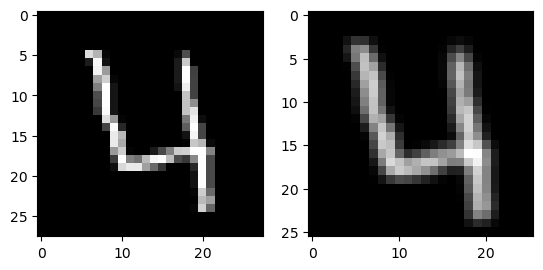

In [22]:
gauss_filtered = signal.convolve(X[3], gauss, mode='valid')

f, axarr = plt.subplots(1,2)
_ = axarr[0].imshow(X[3], cmap='gray')
_ = axarr[1].imshow(gauss_filtered, cmap='gray')

## Through the model

Let's send an image through our model and see what happens.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 12)          1812      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 12)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 120)               2

So, we have used 6 filters in our definition.
Each filter will add a dimension to our output as we can see in the above summary. 
We thus get 6 filtered images.
We can read out the weights as follows.

In [25]:
layer1_weights = model.layers[0].get_weights()[0]
layer1_weights.shape

(5, 5, 1, 6)

Alternatively we can call a layer by its name.

In [26]:
layer1_weights = model.get_layer('conv2d').get_weights()[0]
layer1_weights.shape

(5, 5, 1, 6)

We can see that we have 6 $(5,5)$ filters stored. 
The index after the weight function indiciates that we get the filters. 
An index of 1 will return the bias.
Let's look at a single filter out of those 6.

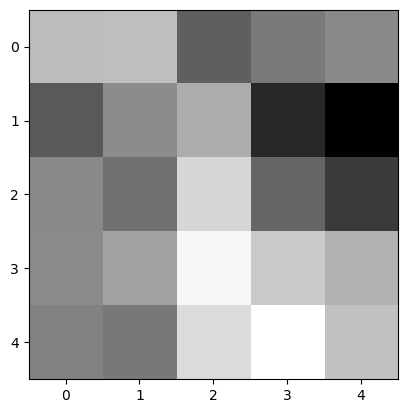

In [28]:
w1 = layer1_weights[:,:,:,0]
_ = plt.imshow(w1, cmap='gray')

Let's see what happens when we apply this to our image.

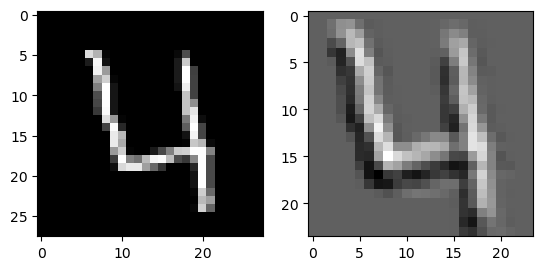

In [38]:
layer1_output = signal.correlate(X[3], w1, mode='valid')

f, axarr = plt.subplots(1,2)
_ = axarr[0].imshow(X[3], cmap='gray')
_ = axarr[1].imshow(first_layer_output, cmap='gray')

We still need to apply the activation function.
In our case it was the ReLu function.

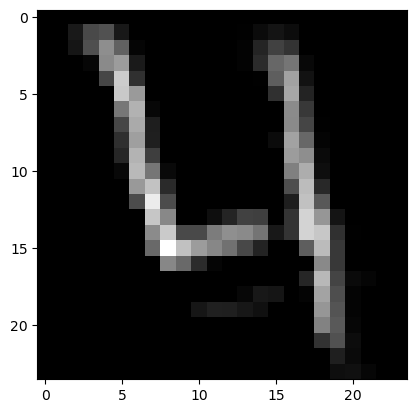

In [40]:
def ReLU(x):
    return x * (x > 0)
vec_relu = np.vectorize(ReLU)

manual_output1 = vec_relu(layer1_output)

_ = plt.imshow(manual_output1, cmap='gray')

We can directly look at the layers in our network using `Keras`.

In [35]:
from keras import backend as K

layer1_output = K.function(
  [model.get_layer('conv2d').input], 
  [model.get_layer('conv2d').output]) 

output1 = layer1_output([X])[0]

output1.shape

(42000, 24, 24, 6)

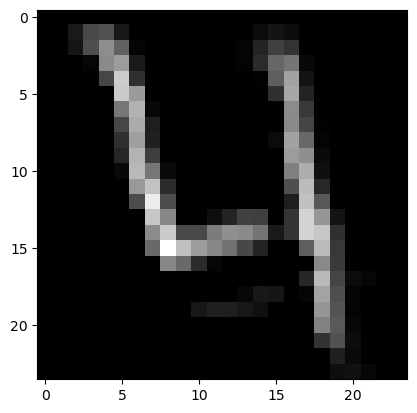

In [42]:
test_output1 = output1[3, :, :, 0]

_ = plt.imshow(test_output1, cmap='gray')

Let's put them side by side.

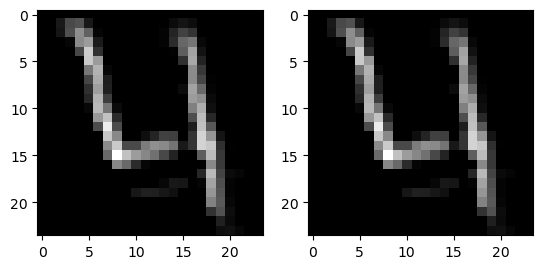

In [43]:
f, axarr = plt.subplots(1,2)
_ = axarr[0].imshow(test_output1, cmap='gray')
_ = axarr[1].imshow(manual_output1, cmap='gray')

Let's look at the next layer, ignoring the pooling layer for the moment.layer3_weights = model.layers[2].get_weights()[0]
layer3_weights.shape

In [44]:
layer3_weights = model.get_layer('conv2d_1').get_weights()[0]
layer3_weights.shape

(5, 5, 6, 12)

Here we can read off that we have 12 filters and each dimension of the filter has to match with its input, hence the dimension is $(5, 5, 6)$.

Again, let's look at an image after a single filter.

In [46]:
get_layer3_output = K.function(
  [model.layers[0].input], 
  [model.layers[2].output]) 

output3 = get_layer3_output([X])[0]
output3.shape

(42000, 8, 8, 12)

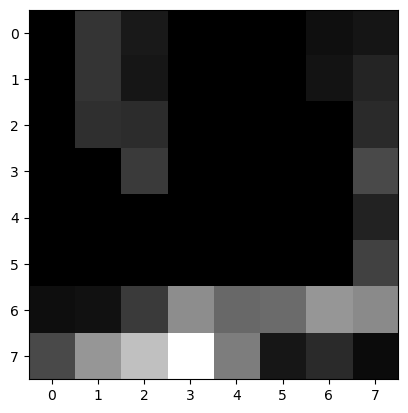

In [47]:
_ = plt.imshow(output3[3, :, :, 0], cmap='gray')

Now we will check what happens.
We will access the output after pooling for the first time.
This should be a subsampled version of what we have seen above.
Then we apply the convolution operation followed by the ReLU function.

In [50]:
get_layer2_output = K.function(
  [model.get_layer('conv2d').input], 
  [model.get_layer('max_pooling2d').output]) 

output2 = get_layer2_output([X])[0]
output2.shape

(42000, 12, 12, 6)

In [51]:
w2 =layer3_weights[:, :, :, 0]
w2.shape

(5, 5, 6)

So, a single output from the first pooling layer will be a $(12, 12, 6)$ tensor and we filter it by a $(5, 5, 6)$ filter.
Thus, we expect an output of the form $(8, 8, 1)$.
Let's double check.

In [52]:
manual_output2 = signal.correlate(output2[3, :, :, :], w2, mode='valid')
manual_output2.shape

(8, 8, 1)

Ok, now let's compare this to `Keras` output.

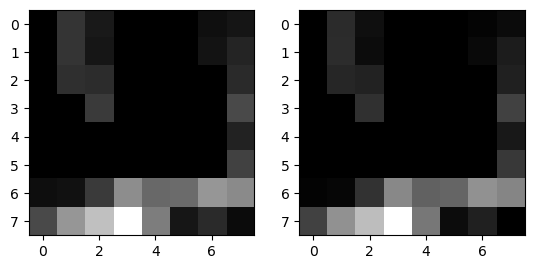

In [54]:
manual_output2 = vec_relu(manual_output2)
f, axarr = plt.subplots(1,2)
_ = axarr[0].imshow(output3[3, :, :, 0], cmap='gray')
_ = axarr[1].imshow(manual_output2, cmap='gray')

## Flattening

Finally, let's look at the output after flattening.
The idea here is that the convolutional layers are learning features of our images.
Then, we use a feed forward neural network to classify the images using these features.
To use a feed forward neural network, we need to transform the output of the convolutional layers into a vector.

In [55]:
get_layer5_output = K.function(
  [model.layers[0].input], 
  [model.layers[4].output]) 

output5 = get_layer5_output([X])[0]
output5.shape

(42000, 192)

In [56]:
conv_output = np.expand_dims(output5[3], axis=1)
conv_output = conv_output[:20, :]

In [57]:
conv_output = np.expand_dims(conv_output, axis=2)

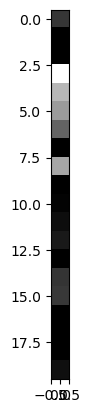

In [58]:
_ = plt.imshow(conv_output, cmap='gray')

# Pooling

Finally, let's talk about pooling.
The idea is very simple.
We simply look at the response in each area of our filtered image.
Here we used `MaxPooling` with a size of $(2,2)$ and stride of same size.
This means that we look at $(2,2)$ submatrices and return the max value.
The idea here is that we don't care where the response is, only that there is a response at all.
For example, suppose we have a filter which is able to detect an eye in a picture, then we just want to know that there is one, not where it is.

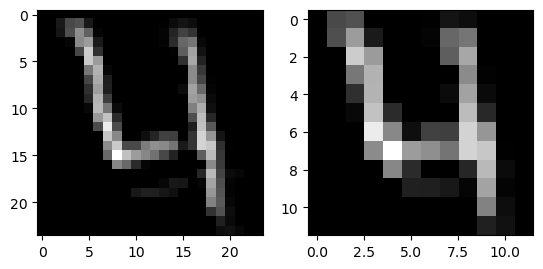

In [60]:
f, axarr = plt.subplots(1,2)
_ = axarr[0].imshow(output[3, :, :, 0], cmap='gray')
_ = axarr[1].imshow(output2[3, :, :, 0], cmap='gray')